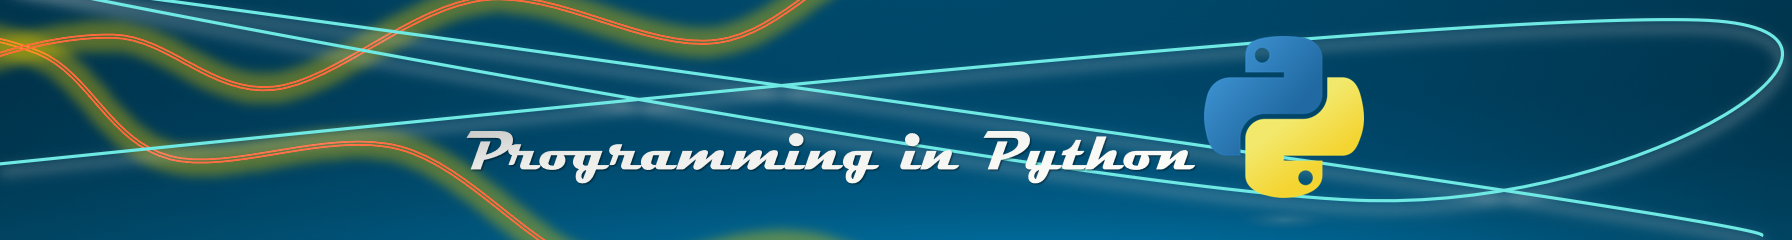

<hr style="border:2px solid black"> </hr>

**Front page of the student’s submission 
(the following are compulsory):**

Module Code:  CS2PP

Assignment report Title:     

Student Number (e.g., 25098635): 32013085

Actual hrs spent for the assignment: 

Which Artificial Intelligence tools used: 


<hr style="border:2px solid black"> </hr>

# CS2PP Programming in Python

<h2 style="color:Crimson;">Coursework 1: Basics of Python</h2>

**Instructions:** 
- Write Python code to perform each of the following sub-tasks.
    - Try to follow the PEP 8 – Style Guide for Python Code: https://peps.python.org/pep-0008
    - Type annotations are not required.
    - **No tools outside of the [Python standard library](https://docs.python.org/3.11/library/index.html) and IPython/JupyterLab utilities should be used.**

- Most of the required techniques are covered in the Lectures and Practicals during Weeks 1-5, but some parts of this assignment may benefit from further self-study of Python documentation or other resources.

- Blank code and markdown cells are provided for each sub-task, however you may create additional cells to provide further explanation or sensibly separate steps toward solution.

**Items to be submitted:**
1. A modified version of this Jupyter notebook file (`.ipynb`)
    - This is to be submitted already **fully executed** in a serial fashion, from top to bottom.
    - Try **Kernel** --> **Restart & Run All Cells...** to verify that this works as intended.

2. A copy of your **fully executed** notebook (**with the `CS2PP_CW1` file name** as in Item 1.) but in `.html` format, which displays all content independently.


3. `cardata_modified.csv`


4. Functions and classes created for this Coursework should be written in a separate `.py` module file and `import`ed to this space.  These should be stored in the submitted archive at the same directory level as the modified notebook (Item 1.).

5. The above, packed into a single `.zip` archive with the following structure:

        12345678_CS2PP_CW1.zip
        ├── data/
        │    ├── dolphin.tsv
        │    ├── cardata.csv
        │    ├── cardata_modified.csv
        │    └── config.json
        ├── CS2PP_CW1.ipynb [completed and fully executed version of this notebook]
        ├── CS2PP_CW1.html [exported copy of previous]
        ├── network.py
        ├── processing.py
        ├── tournament.py
        └── [any auxiliary modules you find necessary]

-----
**Marking scheme:**

Marks | Section
-|:-
20 | **Task 1**: Network Representations
20 | **Task 2**: Data Processing
50 | **Task 3**: Tournament Class
10 | **Task 4**: Coursework Reflection


<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Task 1 [20 Marks]</h2>


- A **network** or **graph**, $G$, consists of a set of **nodes** (or vertices), $V$, and edges, $E$.


- An edge is a pair of nodes $(a,b)$ denoting the nodes connected by the edge.

$$ G = (V,E) $$

![CompareNetworks.png](images/CompareNetworks.png)

---
**The Utility of Networks**

These abstractions apply to many areas of study, including:
- Social Networks 
    - Nodes: The accounts/people
    - Edges: Friends/followers/interactions

- Infrastructure (e.g. the TFL/Tube/London Underground) 
    - Nodes: stations/stops
    - Edges: The routes between stations

- Neuroscience (brains) 
    - Nodes: structural and functional regions of the brain
    - Edges: Pathways between two parts of the brain behaving similarly, or that communicate frequently.
 
Networks are an intuitive way of representing certain datasets, and we can analyse their **structure** to better characterise **properties of the systems** they represent.

For example, we could aim to identify:

- the shortest/**fastest route** to travel from one place to another (e.g., Google/Apple Maps)

- areas of high network traffic in a broadband system, searching for **bottlenecks** in a system that might fail under extreme/heavy load

- **communities** of a social network to help identify groups of people breaking the law

- better audiences for your **targeted** advertisements or medical treatments

- how diseases **spread** within populations to aid in managing outbreaks

- where to apply priority **interventions** in conservation efforts by modeling ecosystem networks (e.g., predators, prey, pollinators, plants)

- cultural transmission **pathways** and solutions to historical mysteries in sociology and anthropology

- **patterns** of language use and evolution

- areas for **improvement** in power grids

- key players, strategies, and team dynamics in **sports analytics**


The variety and creativity found in network theory is quite stunning!

There is a rich literature on network theory and applications

---

**For this Coursework, assume that `(a, b)` and `(b, a)` are equivalent.  That is, the network is *undirected*.**

Networks can be represented in various different data structures.
- We can represent networks using a simple "**edge list**" of all unique node pairs in the network:

$$ V = {a,b,c,d,e}  $$

![Edges.png](images/Edges.png)

- Another data structure that we could use is to build a "**neighbour list**" for every node.


- For every node, $x$, we maintain a list of all the neighbours, $y$.
![Neighbours.png](images/Neighbours.png)


---

With a network properly encoded, their statistics are often evaluated to characterise the system.  For example:

**Degree**: The number of edges per node.
- Answers: Who has the most friends?

**Degree Distribution**: Counting the number of edges each node has, known as the *degree sequence* of the network, we learn the frequency with which each degree occurs.
- Answers: Are there super-connected hubs who can amplify a message or potentially fail and cause disruption?

**Shortest Path**: The shortest route along edges in the graph from one node to another.
- Answers: How can I get from Station A to Station B in the fewest number of stops?

**Clustering Coefficient**: In the range [0,1], we compare $E_N$, the total number of edges actually connecting all nodes that are neighbours of a specific node, and $k$, the number of neighbours of that specific node.
$$ C = \frac{2E_N}{k(k-1)} $$
- Here, half of the denominator represents the maximum number of connecting edges that could exist between $k$ neighbours.  That is, for a node connected to 3 neighbours, the neighbours could be connected to one another along a total of 3 possible edges.  So, we ask, "What fraction of those are actually connected?"
- Large values indicate highly interconnected clustering around a specific node.
- Answers: How tightly knit are a node's local communities?

---
**Data Reference:**

The file `data/dolphins.tsv` contains a representation of a social network dataset where links between dolphins have been recorded if they have frequently associated with one another.
- Modified from the Koblenz Network Collection by the University of Koblenz–Landau.
Dolphins network dataset – KONECT, April 2017.
http://konect.cc/networks/dolphins/.
    

<hr style="border:2px solid black"> </hr>

### Structuring and Analysing Network Data

**Instructions:**

1. In the same directory as `CS2PP_CW1.ipynb`, create a module file called **`network.py`**.
2. `network.py` will contain **six functions**, each with complete, structured docstrings:
    - `file_to_edge_list`: returns a collection of edges of integer pairs as an edge list structure, accepting the path to the file as a keyword argument, `file_name`
        - Use a context manager when reading the file.
    - `edge_to_neighbour_list_1`: returns a neighbour list dictionary representation of the network from the above edge list representation, passed as a single positional argument
    - `edge_to_neighbour_list_2`: a demonstrably **less efficient** implementation, performing the same operation as `edge_to_neighbour_list_1`
    - `inspect_node`: given keyword arguments, `network` and `node`, returns a list of edges associated with the specified node if given an edge list or the set of nodes associated with the specified node
    - `get_degree_statistics`: given a neighbour list representation, returns the maximum, minimum, average, and most common degree values as a 4-element tuple, using a float only when necessary.
        - Use only built-in Python tools to compute these values.  **Import nothing!**
        - Use a `lambda` function to calculate the average.
    - `get_clustering_coefficient`: given keyword arguments, `network` and `node`, for a given neighbour list representation, returns a single float value for the clustering coefficient of the specified node
3. In the annotated code and markdown cells below:
    - Execute `file_to_edge_list`, and display the edges associated with node $25$, based on the edge list representation.
    - Execute `edge_to_neighbour_list_1`, and display the edges associated with nodes $55$, $2$, and $20$.
    - Execute `edge_to_neighbour_list_2`, and display the edges associated with nodes $55$, $2$, and $20$.
    - For both `edge_to_neighbour_list_1` and `edge_to_neighbour_list_2`, use the `timeit` utility (as a Magic command or imported from the standard library) to report the performance of your code, executing **29 runs** of **1700 loops** each.
    - Describe how your two implementations of the conversion from edge list to neighbour list differ.  Explicitly comparing the values reported by `timeit` in your written response, explain why the difference in implementation leads to the difference in efficiency.
    - Execute `get_degree_statistics`, and describe what the returned values indicate.
    - Execute `get_clustering_coefficient` for node $17$, and describe what the returned value indicates.
  
In the above, individual nodes should always be stored as integers.


---
As an example, dolphin `55` is associated with dolphins `2, 7, 8, 14, 20, 42, and 58` and has a degree of $7$.

-----
**Marking:**
- 2 marks for correct implementation relating to each of the 7 execution steps below
- 2 marks for each of the 3 written responses below

-----

**Import tools here:**

In [1]:
from network import *

1. Execute `file_to_edge_list`, and display the edges associated with node $25$, based on the edge list representation.

In [2]:
dolphin_edge_list = file_to_edge_list("./data/dolphins.tsv")
edges_for_25 = inspect_node(network=dolphin_edge_list, node=25)

print("All edges involving node 25:")
print(edges_for_25)

All edges involving node 25:
[(25, 15), (25, 16), (25, 19), (30, 25), (46, 25), (52, 25), (25, 15), (15, 25)]


2. Execute `edge_to_neighbour_list_1`, and display the edges associated with nodes $55$, $2$, and $20$.

In [3]:
def print_neighbours_of_nodes(the_dict):
    print("Neighbors of node 55:", the_dict.get(55, set()))
    print("Neighbors of node 2:", the_dict.get(2, set()))
    print("Neighbors of node 20:", the_dict.get(20, set()))

neighbour_dict_1 = edge_to_neighbour_list_1(dolphin_edge_list)
print_neighbours_of_nodes(neighbour_dict_1)

Neighbors of node 55: {2, 7, 8, 42, 14, 20, 58}
Neighbors of node 2: {37, 42, 18, 20, 55, 27, 28, 29}
Neighbors of node 20: {8, 2, 55, 31}


3. Execute `edge_to_neighbour_list_2`, and display the edges associated with nodes $55$, $2$, and $20$.

In [4]:
neighbour_dict_2 = edge_to_neighbour_list_2(dolphin_edge_list)
print_neighbours_of_nodes(neighbour_dict_2)

Neighbors of node 55: {2, 7, 8, 42, 14, 20, 58}
Neighbors of node 2: {37, 42, 18, 20, 55, 27, 28, 29}
Neighbors of node 20: {8, 2, 55, 31}


4. For both `edge_to_neighbour_list_1` and `edge_to_neighbour_list_2`, use the `timeit` utility (as a Magic command or imported from the standard library) to report the performance of your code, executing **29 runs** of **1700 loops** each.

In [5]:
%%timeit -n 1700 -r 29
edge_to_neighbour_list_1(dolphin_edge_list)


28.8 µs ± 893 ns per loop (mean ± std. dev. of 29 runs, 1,700 loops each)


In [6]:
%%timeit -n 1700 -r 29
edge_to_neighbour_list_2(dolphin_edge_list)

325 µs ± 6 µs per loop (mean ± std. dev. of 29 runs, 1,700 loops each)


5. **Describe** how your two implementations of the conversion from edge list to neighbour list differ.  **Explicitly** comparing the values reported by `timeit` in your written response, explain why the difference in implementation leads to the difference in efficiency.

The "edge_to_neighbour_list_1" method ensures that each edge is only processed once. During the iteration of the edges, the neighbour sets at both endpoints are updated in a single pass rather than performing unnecessary iteration. The time complexity of this approach is proportional to the number of edges "O(E)", this is because for each edge (a,b) a constant amount of work is performed.

The "edge_to_neighbour_list_2" method is less efficient due to its approach using multiple passes. Initially all unique nodes are identified, then iteration is performed over the edge list for each node to discover the neighbouring nodes. The complexity of this is "O(N*E)", where N is the number of nodes and E is the number of edges, because for each node, all edges are rechecked.

The comparison of results established using timeit, configured to use 29 runs and 1700 loops each run, shows the drastic difference in efficiency between the two implementations. The edge_to_neighbour_list_1 method executed in 59.6 µs ± 6 µs per loop, while the edge_to_neighbour_list_2 method took 711 µs ± 31.4 µs per loop. Demonstrating that "edge_to_neighbour_list_1" is approximately 12 times faster than "edge_to_neighbour_list_2".

6. Execute `get_degree_statistics`, and **describe** what the returned values indicate in the following cell.

In [7]:
deg_stats = get_degree_statistics(neighbour_dict_1)
print("Degree statistics (max_degree, min_degree, average_degree, most_common_degree):", deg_stats)

Degree statistics (max_degree, min_degree, average_degree, most_common_degree): (12, 1, 5.129032258064516, 1)


The maximum degree given as 12 means that there is at least one node in the network with 12 neighbours, meaning some nodes are highly connected.

The minimum degree given as 1 means that there is at least one node in the network with 1 neighbour, meaning some nodes are sparcely connected.

The average degree given as ~5.13 means that the average node has around 5 connected nodes, which suggests that the network is reasonably-well connected.

The most common degree given as 1 means that more nodes have only one neighbour than any other degree, this suggests that the node connection distribution is actually quite scarce.

My interpretation of the degree statistics is that while some nodes are well connected, there are also a large portion of nodes which are singularly connected, due to some nodes having high connectivity and others only having one connection, it is possible that the average is inaccurate and instead represents the "middle" of a drastic difference between 1 and 13 and that there are not many nodes which are actually "reasonably connected", instead nodes may be either well connected or sparsely connected without many reasonably connected nodes. This could make traversal more complex because nodes with fewer neighbours will have to traverse other nodes to reach a node which can add computation time.

7. Execute `get_clustering_coefficient` for node $17$, and **describe** what the returned value indicates in the following cell.

In [8]:
node_of_interest = 17
cluster_coefficient = get_clustering_coefficient(network=neighbour_dict_1, node=node_of_interest)
print(f"Clustering coefficient for node {node_of_interest}:", cluster_coefficient)

Clustering coefficient for node 17: 0.6


A clustering coefficient of 0.6 means that 60% of the potential connections between the neighbours of node 17 exist. If all the neighbours of node 17 were to be observed, 60% of the edges which directly connect the neighbours to each other actually exist. A value of 1.0 would indicate a fully-connected network amongst the neighbours of node 17, while 0.0 would indicate that none of node 17's neighbours are directly connected to each other. The value of 0.6 suggests a moderation of connectivity among the neighbours of node 17.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Task 2 [20 Marks]</h2>

---
**Data Reference:**

- Car Features and MSRP Data:	`cardata.csv`


- This dataset includes car features such as make, model, year, and engine type, as scraped from Edmunds and Twitter.  It is often used to develop models to predict car prices based on their other characteristics. 


- Source: https://www.kaggle.com/datasets/CooperUnion/cardataset


- Each **row** corresponds to a single kind of vehicle.


- The **columns** correspond to:

Column | Description
-|:-
Make | Car maker
Model | Car model
Year | Car year (Marketing)
Engine Fuel Type | Type of engine fuel category
Engine HP | Engine horsepower (HP)
Engine Cylinders | Number of engine cylinders
Transmission Type | Type of transmission category
Driven_Wheels | Drive wheel category
Number of Doors | Number of doors
Market Category | Market category
Vehicle Size | Vehicle size category
Vehicle Style | Vehicle style category
highway MPG | Highway fuel efficiency in miles per gallon
city mpg | City fuel efficiency in miles per gallon
Popularity | Twitter-based popularity metric
MSRP | Manufacturer suggested retail price ($, USD)

<hr style="border:2px solid black"> </hr>

### Data Processing

In this section, you will explore the manipulation of data files.

Locate the data file `cardata.csv` within the zipped file you have downloaded from Blackboard (under `./data/`) and read the data from the file.  The data need to be processed to focus on relevant elements, and the result will be written to a new file, `cardata_modified.csv`, to be stored alongside the original file in the same directory.  

The final processed form should have the following attributes, **applied in the following order**:
- The columns corresponding to Engine Fuel Type, Market Category, Number of Doors, and Vehicle Size will have been removed.
- All rows containing entries where the `Make` is `Ford`, `Kia`,  or `Lotus` will have been removed.
- All rows will be unique.  That is, duplicate entries will have been removed.
- Column headers will be modified to match the specification in the table below.
- For the `HP` column, any missing values (`''`) will be replaced with the median of the values existing at this point in the process.
- All other rows that still contain missing values (`''`) will be removed.
- A new column will be created, `HP_Type`, such that, if a car's `HP` is greater than or equal to $300$, `HP_Type` is 'high'.  Otherwise, `HP_Type` is 'low'.
- A new column will be created, `Price_class`, such that its value is equal to:
    - `'high'`, if Price is greater than or equal to $50,000$
    - `'mid'`, if Price is between $30,000$ (inclusive) and $50,000$ (exclusive), and
    - `'low'`, if Price is below $30,000$.
- The `Price` values will be rounded to the **nearest $100**.
- Only cars made **after the `Year` 2000** will be retained in the modified file.
- Only unique car `Make`s with **more than 55 and less than 300 entries** remaining in the dataset will be retained in the modified file.

**Column Header Renaming:**
Column |New name
-|:----- 
Engine HP|HP
Engine Cylinders|Cylinders
Transmission Type|Transmission
Driven_Wheels|Drive Mode
highway MPG|MPG-H
city mpg|MPG-C
MSRP|Price


-----
To implement the above requirements,

1. In the same directory as `CS2PP_CW1.ipynb`, create a module file called **`processing.py`**.
2. `processing.py` will contain this one function with a complete, structured docstring:
    - `process_csv`: given the path to the original file as a single argument, read the original file, make the above modifications, and write the modified data to the specified location.  It will return 2 objects corresponding to the original (i.e., non-processed, `cardata.csv`) and modified (`cardata_modified.csv`) forms of the data.  Each object will be a list, reporting 7 pieces of information, in this order:
        - The number of rows, integer.
        - The number of columns, integer.
        - The number of unique `Make` entries, integer.
        - The number of entries from 2009, integer.
        - The average `MSRP` or `Price` of entries of cars of the "Impala" `Model`, rounded to 2 decimal places with banker's rounding, string with only numerals and decimal (e.g., `51338.30`).
        - The average `MSRP` or `Price` of entries of cars of the "Integra" `Model`, rounded to 2 decimal places with banker's rounding, string with only numerals and decimal (e.g., `1098.12`).
        - The name of the `Model` with the fewest "Midsize" cars, string.
   - Any number of additional functions can be used to assist in development and execution.
3. In the annotated code and markdown cells below:
    - Execute `process_csv` and print its 2 resulting objects.
    - Ensure that the modified data resides in **`./data/cardata_modified.csv`**, formatted as specified.

-----
**Marking:**

- 1 mark will be awarded for each of the 14 above pieces of information reported correctly.
- 2 marks for a correctly constructed `cardata_modified.csv`
- 4 marks for well-commented and structured code

-----

**Import tools here:**

In [1]:
from processing import process_csv
import pprint


Execute `process_csv` and print its 2 resulting objects.

In [3]:
original_summary, modified_summary = process_csv('./data/cardata.csv')

print("Original Data Summary:")
pprint.pprint(original_summary)

print("\nModified Data Summary:")
pprint.pprint(modified_summary)


Original Data Summary:
[11914, 16, 48, 379, '33558.61', '11768.58', '']

Modified Data Summary:
[3121, 14, 21, 112, '0.00', '21536.36', '']


Ensure that the modified data resides in the `./data/` directory in a file named and formatted as specified.

In [5]:
import os

modified_filepath = './data/cardata_modified.csv'

if os.path.exists(modified_filepath):
    print(f"Modified file exists at {modified_filepath}")
else:
    print(f"Modified file NOT found at {modified_filepath}")


Modified file exists at ./data/cardata_modified.csv


<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Task 3 [50 Marks]</h2>


![Bracket](images/Bracket.png)

Design a `Tournament` class to represent **teams** of car efficiency enthusiasts that can collect an **inventory** of fuel efficient cars by finding sponsorship from car makers. 

Once **sponsors** are arranged and teams are formed, teams will **compete** by facing off head-to-head (pairwise, bracket-style) until only one `Tournament.champion` prevails. 

Competitors perform by driving each car in their inventory the distance that **1 gallon** of fuel will permit them to travel in **highway** situations.  

The **winning team** of a match will have collectively driven their vehicles the furthest.  That is, the sum of the `MPG-H` ratings in their inventory will be the **score** that decides the winner.

---
### Define a `Tournament` class

**[30 Marks]** *as noted below*



Your are to translate **the following requirements** (with consideration of their usage, defined in the next sections) into working code.

**Overall**: *[4 marks]* Coding efficiency and structure, including comments and docstrings, where appropriate, will contribute to the mark in this section.

- The `Tournament` class will be defined in **`tournament.py`** in the same directory as `CS2PP_CW1.ipynb`.
- *[4 marks]* The class is initialised by reading the contents of **`config.json`**, which you will create and store in the `./data/` directory, specifying:
    - the `path` to the **modified car** data file, as designed above
    - a tournament `name`
    - **optionally,** the number of competing teams, defaulting to 16, `nteams`
    - `default_low`, corresponding to the default `low` value in `generate_sponsors`
    - `default_high`, corresponding to the default `high` value in `generate_sponsors`
    - `default_incr`, corresponding to the default `incr` value in `generate_sponsors`
- *[1 mark]* If the input number of teams is not an integer, `raise` the appropriate kind of exception, and a message saying, "The number of teams must be an integer."
- *[1 mark]* Also, `assert` that the number of teams is positive and non-zero.
- *[1 mark]* Ensure that the number of teams is a **power of 2**.
- *[2 marks]* Include sensible object representation dunder methods (i.e. `__repr__` and `__str__`).

- *[2 marks]* There is a method to `generate_sponsors`.
    - The method, by default, **randomly selects a sponsor** for each team from the available list of `Make`rs (with no duplicates).
    - It **accepts a list of specified sponsors as an optional keyword argument**, `sponsor_list`, with a length not exceeding the number of teams.
        - If the supplied list is shorter, the remainder of the teams will be set random sponsors, as in the default case.
    - Once sponsors are selected, the sponsor **randomly allocates a budget** in some suitably chosen range of incremental integer values defined by `low`, `high`, and `incr` keyword parameters to this `generate_sponsors` method.  Choose sensible default values for these.
    - An optional keyword argument, `fixed_budget`, will set a user-specified fixed numerical budget value for all teams if provided and within the default `low` and `high` bounds.
    - Store the resulting sponsor and budget information as attributes of the `Tournament` class.    

- *[1 mark]* There is a method to `generate_teams`.
    - This method should simply populate a list of `Team`s in the `Tournament` class.
    

- *[3 marks]* The teams are members of the `Team` class, which is a class **internal to the `Tournament` class**.
    - A `Team` object holds information about its:
        - sponsor
        - budget
        - inventory
        - `active` status, i.e. whether they are eligible to compete in the next round of the tournament.
        - performance record (e.g., win/loss, score, number of cars they used in competition)
    - This class has some kind of `__str__` representation.
    - Be thoughtful about which of these characteristics are mutable and how to change them if they are not mutable.

- *[1 mark]* There is a method to `buy_cars`.
    - This method will allow the `Team`s to each purchase their initial inventory.

- *[5 marks]* There is a method to `_purchase_inventory`.
    - This non-public method takes 1 argument: a single `Team` object.
    - With the information provided by the `Team`, isolate cars that are available from the **sponsoring `Make`**.  
    - Considering the `Team` budget, select the set of cars representing the **optimal choice**.  That is, purchase as many cars as the budget permits, while trying to **maximise `MPG-H`**.  
        - For this combinatorial optimisation problem, use a greedy method.
    - When these are selected, the `Team`'s budget and inventory should be updated.
    
- *[5 marks]* There is a method to `hold_event` (i.e., execute the tournament competition process).
    - This will start the process to cycle through the pairwise matches, keeping track of individual `Team` performance metrics.
        - The teams will compete in a head to head match and either continue on or be **eliminated** from the competition.
    - After each match, allocate a **financial prize** of $50,000 to the winning `Team`.
    - After awarding the prize, allow the `Team` to `_purchase_inventory` again (increasing the number of cars in their inventory) before the next match.  
        - Newly purchased cars can be duplicates of members of the `Team`'s existing inventory, but only one any kind of car is permitted to be purchased in an individual `_purchase_inventory` action.  For example, when purchasing inventory, one cannot obtain 10 of the same car in a single transaction.
    - At the end of the tournament event, record the `Tournament.champion` `Team`.  

-----

### Execute the `Tournament` class

**[5 Marks]**

- The process of building and executing the stages associated with the tournament will look like this:
```python
t1 = Tournament('./data/config.json')
t1.generate_sponsors()
t1.generate_teams()
t1.buy_cars()
t1.hold_event()
print(f'The champion of {t1.name} Tournament is the {t1.champion}.')
```
```
...
The champion of The First Folks Tournament is the Team sponsored by Nissan with $32000 available and 32 cars.
```

- Produce some visual (e.g., printed text) record of the `Tournament` matches by invoking the `show_win_record` method:
```python
t1.show_win_record()
```
```
...

           Scion: ['W     ', 'W     ', 'L     ']
          Suzuki: ['L     ']
          Subaru: ['W     ', 'L     ']
      Land Rover: ['L     ']
          Nissan: ['W     ', 'W     ', 'W     ', 'W     ']
           Dodge: ['L     ']
           Lexus: ['L     ']
            Saab: ['W     ', 'L     ']
   Mercedes-Benz: ['L     ']
           Buick: ['W     ', 'L     ']
      Volkswagen: ['W     ', 'W     ', 'L     ']
      Oldsmobile: ['L     ']
         Hyundai: ['W     ', 'W     ', 'W     ', 'L     ']
        Infiniti: ['L     ']
        Cadillac: ['L     ']
             BMW: ['W     ', 'L     ']
```

-----
**Marking:**
- 3 marks for functional execution
- 2 marks for win record display

-----

**Import tools here:**

### Compare multiple `Tournament` instance executions

**[5 Marks]**

- **Execute 2 `Tournament` instances** in full.  
- Compare the performance of their `.champion`s by using their instance objects with the `>=` operator:

```python
higher = t1 if t1 >= t2 else t2
print(f'The champion of the {higher.name} Tournament scored higher.')
```

-----
**Marking:**
- 1 marks for complete and different Tournament execution
- 3 marks for well-implemented, well-commented, and functional comparison

-----

In [9]:
# initialise and execute t1 (or use result from above)

# initialise and execute t2

higher = t1 if t1 >= t2 else t2
print(f'The champion of the {higher.name} Tournament scored higher.')

NameError: name 't1' is not defined

-----

### Extend the `Tournament` class

**[10 Marks]**

Create a child of the `Tournament` class, called `Tournament_optimised` in the same **`tournament.py`** module.  

In this version, `_purchase_inventory` will compute the combinatorial problem using a dynamic programming method, which is guaranteed to yield the optimal solution, unlike the greedy method.

Below, demonstrate that the optimised method produces a **different** result than the greedy method by executing the tournament process for both classes while using the same fixed configuration (no randomness).

**Note:** Because the greedy method can produce the optimal solution by chance, you may need to try different configurations to find settings that indeed yield different results. 

-----
**Marking:**
- 6 marks for correct, functional implementation
- 4 marks for high-quality explanation

-----

**Explain why these solutions are different.  Are you able to explain why the greedy solution is less optimal?**

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Task 4 [10 Marks]</h2>

#### Reflecting on Your Work

In the above tasks, you will have employed several concepts demonstrated in Lectures and Practical Sessions 1-4.

For each of the 4 Weeks, write 2 sentences describing how 2 concepts from the week were used in your solution.

Then, in no more than 2 sentences, describe the most challenging aspect of this coursework and how you might approach a similar task differently in the future.

-----
**Marking:**
- 2 marks for high-quality responses to each of the 5 items below

-----

**Week 1**

**Week 2**

**Week 3**

**Week 4**

**Most Challenging Aspect**